In [33]:
import numpy as np
import pandas as pd

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

Se carga el data set

In [35]:
df = pd.read_csv('fifa_data.csv')
len(df)

18207

Se elimina columna que no apotar valor al set de datos

In [36]:
df =df.drop(['Unnamed: 0'], axis=1)
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [37]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

Se realiza una limpieza y cambio de formato de la columna Value para poder utilizarla en los siguientes analisis

In [38]:
df['Value'].unique()

array(['€110.5M', '€77M', '€118.5M', '€72M', '€102M', '€93M', '€67M',
       '€80M', '€51M', '€68M', '€76.5M', '€44M', '€60M', '€63M', '€89M',
       '€83.5M', '€78M', '€58M', '€53.5M', '€51.5M', '€38M', '€64.5M',
       '€27M', '€81M', '€69.5M', '€59.5M', '€62M', '€73.5M', '€59M',
       '€46M', '€43M', '€36M', '€57M', '€24M', '€30M', '€4M', '€64M',
       '€30.5M', '€62.5M', '€52M', '€45M', '€34M', '€46.5M', '€61M',
       '€41.5M', '€44.5M', '€56.5M', '€53M', '€50M', '€55M', '€36.5M',
       '€45.5M', '€43.5M', '€35M', '€39M', '€18M', '€21.5M', '€50.5M',
       '€54M', '€40.5M', '€37.5M', '€28.5M', '€37M', '€32M', '€26M',
       '€33M', '€38.5M', '€35.5M', '€9M', '€15.5M', '€22M', '€14M',
       '€42.5M', '€31.5M', '€42M', '€25M', '€29.5M', '€31M', '€24.5M',
       '€27.5M', '€29M', '€16.5M', '€23M', '€19M', '€4.2M', '€40M',
       '€41M', '€28M', '€22.5M', '€34.5M', '€32.5M', '€20M', '€26.5M',
       '€25.5M', '€21M', '€13M', '€17.5M', '€11.5M', '€8M', '€6M',
       '€19.5M', '€6.5

In [39]:
#df['Value'] = df['Value'].astype(str).apply(lambda x: x[1:-1])
valores = []
for valor in df['Value']:
    if (valor[-1:] == 'M'):
        #print("-> ", valor[1:-1], "--> ", valor)
        #print(float(valor[1:-1])*1000000)
        valores.append(float(valor[1:-1])*1000000)
    elif(valor[-1:] == 'K'):
        #print("-> ", valor[1:-1], "--> ", valor)
        #print(float(valor[1:-1])*1000)
        valores.append(float(valor[1:-1])*1000)


In [40]:
encabezado = ['Value-NUM']
df_value_num = pd.DataFrame(valores, columns = encabezado)

In [41]:


df['Value-NUM'] = df_value_num['Value-NUM']

In [65]:
#df['Value'] = df['Value'].astype(str).apply(lambda x: x[1:-1])

In [67]:
#df.replace(' ', np.nan, inplace = True)
#df.replace('', np.nan, inplace = True)
#df["Value"].replace(np.nan, 0, inplace=True)

In [68]:
#df['Value'] = df['Value'].astype("float64")

In [42]:
df['Value-NUM'].unique()

array([1.105e+08, 7.700e+07, 1.185e+08, 7.200e+07, 1.020e+08, 9.300e+07,
       6.700e+07, 8.000e+07, 5.100e+07, 6.800e+07, 7.650e+07, 4.400e+07,
       6.000e+07, 6.300e+07, 8.900e+07, 8.350e+07, 7.800e+07, 5.800e+07,
       5.350e+07, 5.150e+07, 3.800e+07, 6.450e+07, 2.700e+07, 8.100e+07,
       6.950e+07, 5.950e+07, 6.200e+07, 7.350e+07, 5.900e+07, 4.600e+07,
       4.300e+07, 3.600e+07, 5.700e+07, 2.400e+07, 3.000e+07, 4.000e+06,
       6.400e+07, 3.050e+07, 6.250e+07, 5.200e+07, 4.500e+07, 3.400e+07,
       4.650e+07, 6.100e+07, 4.150e+07, 4.450e+07, 5.650e+07, 5.300e+07,
       5.000e+07, 5.500e+07, 3.650e+07, 4.550e+07, 4.350e+07, 3.500e+07,
       3.900e+07, 1.800e+07, 2.150e+07, 5.050e+07, 5.400e+07, 4.050e+07,
       3.750e+07, 2.850e+07, 3.700e+07, 3.200e+07, 2.600e+07, 3.300e+07,
       3.850e+07, 3.550e+07, 9.000e+06, 1.550e+07, 2.200e+07, 1.400e+07,
       4.250e+07, 3.150e+07, 4.200e+07, 2.500e+07, 2.950e+07, 3.100e+07,
       2.450e+07, 2.750e+07, 2.900e+07, 1.650e+07, 

In [43]:
df.replace(' ', np.nan, inplace = True)
df.replace('', np.nan, inplace = True)
df["Value-NUM"].replace(np.nan, 0, inplace=True)

In [44]:
df['Value-NUM'].unique()

array([1.105e+08, 7.700e+07, 1.185e+08, 7.200e+07, 1.020e+08, 9.300e+07,
       6.700e+07, 8.000e+07, 5.100e+07, 6.800e+07, 7.650e+07, 4.400e+07,
       6.000e+07, 6.300e+07, 8.900e+07, 8.350e+07, 7.800e+07, 5.800e+07,
       5.350e+07, 5.150e+07, 3.800e+07, 6.450e+07, 2.700e+07, 8.100e+07,
       6.950e+07, 5.950e+07, 6.200e+07, 7.350e+07, 5.900e+07, 4.600e+07,
       4.300e+07, 3.600e+07, 5.700e+07, 2.400e+07, 3.000e+07, 4.000e+06,
       6.400e+07, 3.050e+07, 6.250e+07, 5.200e+07, 4.500e+07, 3.400e+07,
       4.650e+07, 6.100e+07, 4.150e+07, 4.450e+07, 5.650e+07, 5.300e+07,
       5.000e+07, 5.500e+07, 3.650e+07, 4.550e+07, 4.350e+07, 3.500e+07,
       3.900e+07, 1.800e+07, 2.150e+07, 5.050e+07, 5.400e+07, 4.050e+07,
       3.750e+07, 2.850e+07, 3.700e+07, 3.200e+07, 2.600e+07, 3.300e+07,
       3.850e+07, 3.550e+07, 9.000e+06, 1.550e+07, 2.200e+07, 1.400e+07,
       4.250e+07, 3.150e+07, 4.200e+07, 2.500e+07, 2.950e+07, 3.100e+07,
       2.450e+07, 2.750e+07, 2.900e+07, 1.650e+07, 

Se analiza correlacion de las columnas Potential, Overall y Value

In [45]:
df[['Potential', 'Overall','Value-NUM']].corr()

,Potential,Overall,Value-NUM
Potential,1.000000,0.660939,0.535379
Overall,0.660939,1.000000,0.630126
Value-NUM,0.535379,0.630126,1.000000


(0.0, 96.4)

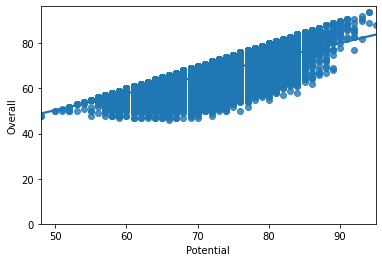

In [46]:
sns.regplot(x="Potential", y="Overall", data=df)
plt.ylim(0,)

(0.0, 124844301.63367479)

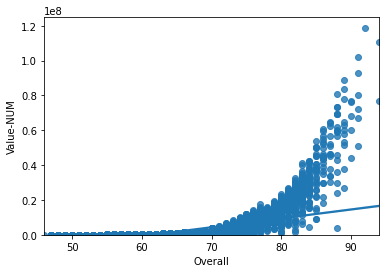

In [47]:
sns.regplot(x="Overall", y="Value-NUM", data=df)
plt.ylim(0,)